In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')


In [3]:
import numpy as np

1. I need to generate the new dataset, using the information from cholecT50 and information from CholecInstanceSeg. 
2. Essentially I am creating another new sets of json which combines the information from CholecT50 and CholecInstanceSeg. 
3. I need to also create a new sets of images, which would be a filtered down version of what we currently have. 


What is the filtration parameters? 

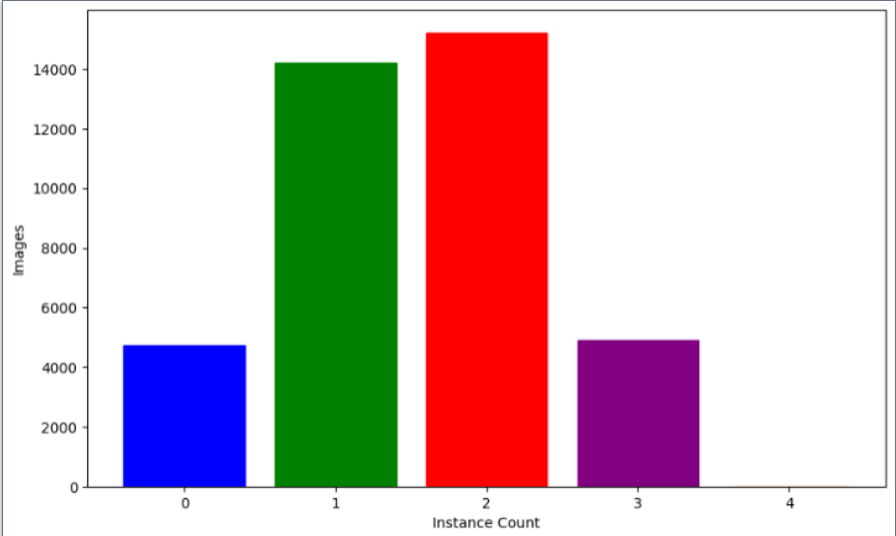

We want every image with no instruments - We know what to set the values to empty actions. Confirm with T50.  
We want every image with one instrument - We want all the single instance images. These have just a single instance so no matching problem. 
We want every image where there is only one instance of every instrument and this is matched in CholecT50. 

How do we store this new dataset? 
It is not possible to store it like the original dataset. The original dataset uses a 15 or 16 bit value for each information. we have a single value for all our instruments. 
We need to store it in the labelMe format as well, and maybe also add ways of annotating for action and target when we segment. 

So it is agreed. We are going to use our label me format and for each shape value, we are going to include something the corresponding action and target values. We will store these as names. 
There corresponding IDs shall be in the static variables


Steps to take. 

First 
find all the images with one of each instrument or no instrument entirely. 

We also

Second.
Then we check against CholecT50, to see if these images have the same amout of instances and class_names, correct those that dont. 

Third.
We copy the jsons we have found and the corresponding images to a new folder called action triplet dataset. 
We add the values for target and action to the shapes. 



We also check all those with multiple instruments of the same class_names. 
If the action and target are all the same also include them.

## Using the dataset single_folder style

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import sys
sys.path.append("../..")
from utils.dataset_metadata import DatasetMetadata
from utils.read_files import read_from_json  
from static_variables.dataset_variables import CholecInstanceSegVariables

In [19]:
path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/instance_cholec_v7_during_quality_control'
dataset_name = 'cholecinstanceseg'
dataset_folder_style = "single_folder_style"
class_names = list(CholecInstanceSegVariables.instrument_id_to_instrument_class_dict.values())

In [20]:
class_names

['grasper', 'hook', 'irrigator', 'clipper', 'bipolar', 'scissors', 'snare']

In [4]:
dataset = DatasetMetadata(path_to_dataset=path_to_dataset,
                        dataset_name=dataset_name,
                        dataset_folder_style=dataset_folder_style)
                

In [11]:
dataset_metadata_single_folder_style = dataset.get_dataset_metadata(dataset_folder_style)

In [ ]:
dataset_metadata_single_folder_style

Access all the annotations, and we only want the ones with no instruments and one instrument

In [24]:
def generate_class_frequency_dict_from_ann_path(ann_path):   
        class_frequency_dict_for_ann = {class_name: 0   for class_name in class_names}
        ann = read_from_json(ann_path)
        for shape in ann['shapes']:
            assert shape['group_id'] != 0, f"there is an error in {ann_path}, there is a group id that is 0 for {shape['label']}"
            if shape['group_id'] > class_frequency_dict_for_ann[shape['label']]: #handle multiple shapes with the same group_id 
                class_frequency_dict_for_ann[shape['label']] += 1 
        return class_frequency_dict_for_ann

In [22]:
def split_annotations_in_cholecinstanceseg_into_oneorlessinstanceofaclass_multipleinstancesofaclass(dataset_metadata_single_folder_style):
    oneorlessinstanceofaclass = []
    multipleinstancesofaclass = []
    for seq_name, seq_info in dataset_metadata_single_folder_style.items(): 
        for ann_info in seq_info:   
            ann_path = ann_info['ann_path'] 
            class_frequency_dict_for_ann =  generate_class_frequency_dict_from_ann_path(ann_path)
            
            #check if any of the frequency is above 1.
            does_image_have_one_or_less_instance_of_a_class = True
            for class_name, frequency in class_frequency_dict_for_ann.items():
                if frequency > 1:
                    does_image_have_one_or_less_instance_of_a_class = False
                    break
            
            # add the class frequency dict to the img and ann dict
            ann_info['class_frequency_dict'] = class_frequency_dict_for_ann 
            
            # add them to the aggregating list
            if does_image_have_one_or_less_instance_of_a_class:
                oneorlessinstanceofaclass.append(ann_info)
            else:
                multipleinstancesofaclass.append(ann_info)    
            
    return (oneorlessinstanceofaclass, multipleinstancesofaclass)        
                    
                     

In [ ]:
oneorlessinstanceofaclass, multipleinstancesofaclass = split_annotations_in_cholecinstanceseg_into_oneorlessinstanceofaclass_multipleinstancesofaclass(dataset_metadata_single_folder_style)

In [30]:
len(multipleinstancesofaclass)

8146

In [31]:
len(oneorlessinstanceofaclass)

30932

Excellent, we would not worry about multiple instruments for now

## Quick quality control

In [ ]:
def compare_annotations_with_zero_tools_and_one_tool_with_cholecT50_classname_and_instance_name():
    # return the ones that are correct, the ones that are wrong, and what was different.
    pass

In [ ]:
def get_annotations_with_multiple_tools(): 
    pass

In [ ]:
def get_annotations_with_multiple_tools_that_agree_with_cholecT50():
    pass

In [ ]:
def get_annotations_with_multiple_tools_that_agree_with_cholecT50_and_have_same_action_and_targets():
    pass

In [ ]:
def create_triplet_dataset_from_cholecinstanceseg():
    pass